# Predicting lap of pit stop from Formula 1 Race Data
# &copy; 2020 GarageDataLab


In [35]:
#import packages
import markdown
md = markdown.Markdown(extensions=['pymdownx.smartsymbols'])
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
#import the data from .csv files
#https://www.kaggle.com/cjgdev/formula-1-race-data-19502017
laptimes_data = pd.read_csv('/Users/lindseyclark/Downloads/archive/lapTimes.csv', encoding = "ISO-8859-1", engine='python')
pitstops_data = pd.read_csv('/Users/lindseyclark/Downloads/archive/pitStops.csv', encoding = "ISO-8859-1", engine='python')
constructors_data = pd.read_csv('/Users/lindseyclark/Downloads/archive/constructors.csv', encoding = "ISO-8859-1", engine='python ')
drivers_data = pd.read_csv('/Users/lindseyclark/Downloads/archive/drivers.csv', encoding = "ISO-8859-1", engine='python')

###



In [6]:
laptimes_data.columns

Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')

In [7]:
pitstops_data.columns

Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration',
       'milliseconds'],
      dtype='object')

In [8]:
constructors_data.columns

Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url',
       'Unnamed: 5'],
      dtype='object')

In [9]:
drivers_data.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [10]:
laptimes_data.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [11]:
pitstops_data.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [30]:
data = pd.merge(laptimes_data, pitstops_data,  how='left', left_on=['raceId','driverId'], 
                right_on = ['raceId','driverId'])






In [31]:
data

,raceId,driverId,lap_x,position,time_x,milliseconds_x,stop,lap_y,time_y,duration,milliseconds_y
0,841,20,1,1,1:38.109,98109,1.0,14.0,17:25:17,22.603,22603.0
1,841,20,1,1,1:38.109,98109,2.0,36.0,17:59:17,24.036,24036.0
2,841,20,2,1,1:33.006,93006,1.0,14.0,17:25:17,22.603,22603.0
3,841,20,2,1,1:33.006,93006,2.0,36.0,17:59:17,24.036,24036.0
4,841,20,3,1,1:32.713,92713,1.0,14.0,17:25:17,22.603,22603.0
...,...,...,...,...,...,...,...,...,...,...,...
626389,988,825,50,13,1:43.928,103928,1.0,22.0,17:42:42,21.875,21875.0
626390,988,825,51,13,1:44.138,104138,1.0,22.0,17:42:42,21.875,21875.0
626391,988,825,52,13,1:43.934,103934,1.0,22.0,17:42:42,21.875,21875.0
626392,988,825,53,13,1:44.164,104164,1.0,22.0,17:42:42,21.875,21875.0


In [26]:
pitstops_data.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object

([<matplotlib.axis.XTick at 0x1136c4cd0>,
 <a list of 5 Text major ticklabel objects>)

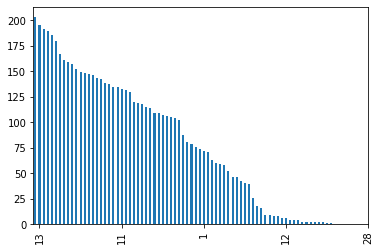

In [27]:
fig, ax = plt.subplots()
pitstops_data['lap'].value_counts().plot(ax=ax, kind='bar')
plt.xticks(np.arange(1, 100+1, 20))


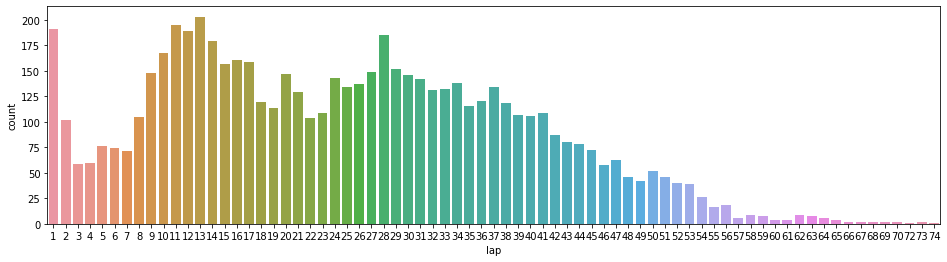

In [29]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x="lap",data=pitstops_data)
plt.show()

Problem: Predict the which lap a pit stop is most likely to happen